# Cervical Cancer Risk Classification Analysis

This notebook covers the analysis of the cervical cancer risk classification dataset. The analysis includes data loading, cleaning, visualization (including heatmaps), applying various machine learning models, and evaluating these models.


In [52]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier


# Load the dataset
file_path = r"C:\Users\akshi\OneDrive\Desktop\projects\cervical cancer\kag_risk_factors_cervical_cancer.csv"  # Update this path if necessary
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe
print(df.head())



   Age Number of sexual partners First sexual intercourse Num of pregnancies  \
0   18                       4.0                     15.0                1.0   
1   15                       1.0                     14.0                1.0   
2   34                       1.0                        ?                1.0   
3   52                       5.0                     16.0                4.0   
4   46                       3.0                     21.0                4.0   

  Smokes Smokes (years) Smokes (packs/year) Hormonal Contraceptives  \
0    0.0            0.0                 0.0                     0.0   
1    0.0            0.0                 0.0                     0.0   
2    0.0            0.0                 0.0                     0.0   
3    1.0           37.0                37.0                     1.0   
4    0.0            0.0                 0.0                     1.0   

  Hormonal Contraceptives (years)  IUD  ... STDs: Time since first diagnosis  \
0           

In [53]:
# Check for missing values
print(df.isnull().sum())


Age                                   0
Number of sexual partners             0
First sexual intercourse              0
Num of pregnancies                    0
Smokes                                0
Smokes (years)                        0
Smokes (packs/year)                   0
Hormonal Contraceptives               0
Hormonal Contraceptives (years)       0
IUD                                   0
IUD (years)                           0
STDs                                  0
STDs (number)                         0
STDs:condylomatosis                   0
STDs:cervical condylomatosis          0
STDs:vaginal condylomatosis           0
STDs:vulvo-perineal condylomatosis    0
STDs:syphilis                         0
STDs:pelvic inflammatory disease      0
STDs:genital herpes                   0
STDs:molluscum contagiosum            0
STDs:AIDS                             0
STDs:HIV                              0
STDs:Hepatitis B                      0
STDs:HPV                              0


In [54]:

df.replace('?', np.nan, inplace=True)
df = df.apply(pd.to_numeric, errors='coerce')

df.fillna(df.mean(), inplace=True)
print(df.head())

   Age  Number of sexual partners  First sexual intercourse  \
0   18                        4.0                   15.0000   
1   15                        1.0                   14.0000   
2   34                        1.0                   16.9953   
3   52                        5.0                   16.0000   
4   46                        3.0                   21.0000   

   Num of pregnancies  Smokes  Smokes (years)  Smokes (packs/year)  \
0                 1.0     0.0             0.0                  0.0   
1                 1.0     0.0             0.0                  0.0   
2                 1.0     0.0             0.0                  0.0   
3                 4.0     1.0            37.0                 37.0   
4                 4.0     0.0             0.0                  0.0   

   Hormonal Contraceptives  Hormonal Contraceptives (years)  IUD  ...  \
0                      0.0                              0.0  0.0  ...   
1                      0.0                            

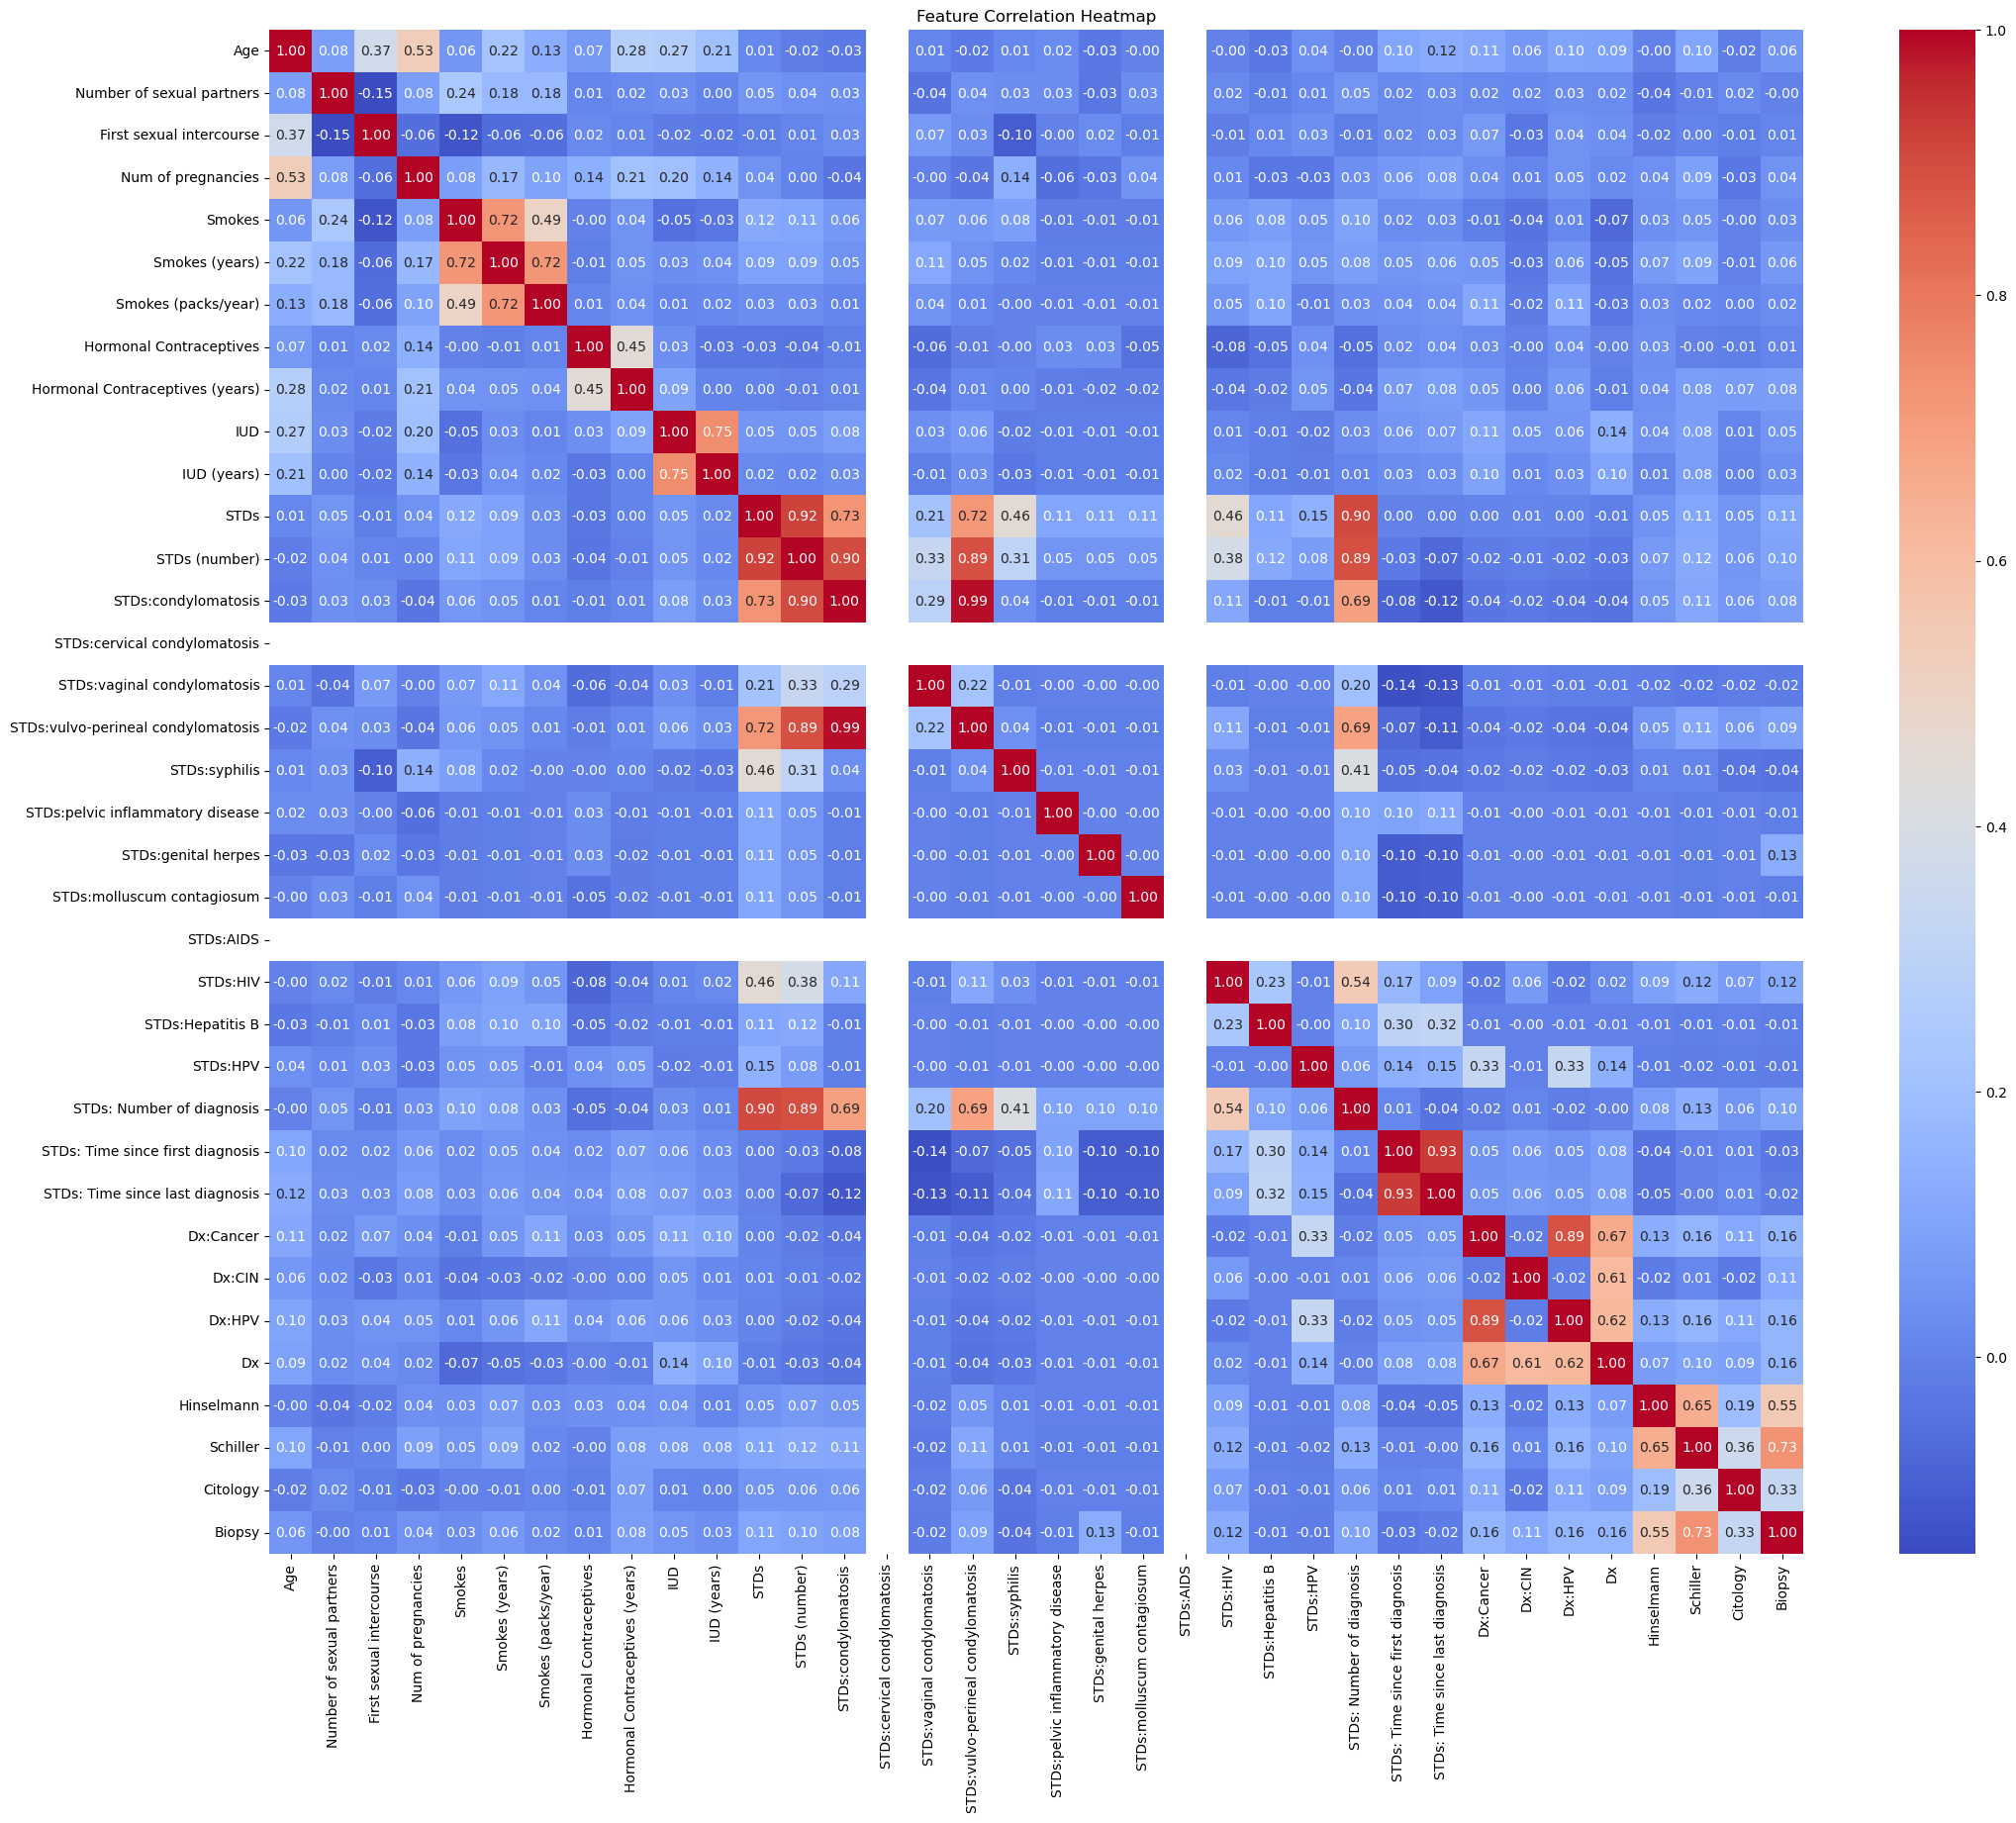

In [55]:
# Calculate correlations
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(25, 20))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()


In [56]:
# Calculate correlations
corr = df.corr()

# Unstack the correlation matrix to a Series of pairwise correlations
corr_pairs = corr.unstack()

# Remove self-correlations by excluding pairs with equal indices
unique_corr_pairs = corr_pairs[corr_pairs.index.get_level_values(0) != corr_pairs.index.get_level_values(1)]

# Create a DataFrame from the unique_corr_pairs with reset index to easily filter duplicates
corr_pairs_df = unique_corr_pairs.reset_index()
corr_pairs_df.columns = ['Feature1', 'Feature2', 'Correlation']

# Sort the DataFrame by absolute correlation values in descending order
corr_pairs_df['AbsoluteCorrelation'] = corr_pairs_df['Correlation'].abs()
sorted_corr_pairs_df = corr_pairs_df.sort_values(by='AbsoluteCorrelation', ascending=False)

# Remove duplicate pairs, considering (Feature1, Feature2) the same as (Feature2, Feature1)
# This is achieved by applying a sorted tuple to each pair, ensuring uniqueness
sorted_corr_pairs_df['SortedPair'] = sorted_corr_pairs_df.apply(lambda row: tuple(sorted([row['Feature1'], row['Feature2']])), axis=1)
distinct_sorted_pairs_df = sorted_corr_pairs_df.drop_duplicates(subset='SortedPair').drop('SortedPair', axis=1)

# Display the top distinct pairs with the greatest absolute correlation in tabular form
print("Distinct pairs with greatest correlation in tabular form:")
distinct_sorted_pairs_df = distinct_sorted_pairs_df.drop('AbsoluteCorrelation', axis=1)
print(distinct_sorted_pairs_df.head(30))  # Adjust the number to display more or fewer top pairs


Distinct pairs with greatest correlation in tabular form:
                                Feature1                            Feature2  \
573   STDs:vulvo-perineal condylomatosis                 STDs:condylomatosis   
971      STDs: Time since last diagnosis    STDs: Time since first diagnosis   
396                                 STDs                       STDs (number)   
886            STDs: Number of diagnosis                                STDs   
432                        STDs (number)                 STDs:condylomatosis   
887            STDs: Number of diagnosis                       STDs (number)   
572   STDs:vulvo-perineal condylomatosis                       STDs (number)   
1009                           Dx:Cancer                              Dx:HPV   
359                          IUD (years)                                 IUD   
1258                              Biopsy                            Schiller   
466                  STDs:condylomatosis                      

Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        17

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        17

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

SVM Accuracy: 0.9709302325581395
              precision    recall  f1-score   support

           0       0.97      1.00      0.98       155
           1       1.00      0.71      0.83        17

    accuracy                           0.97       172
   macro avg       0.98      0.85

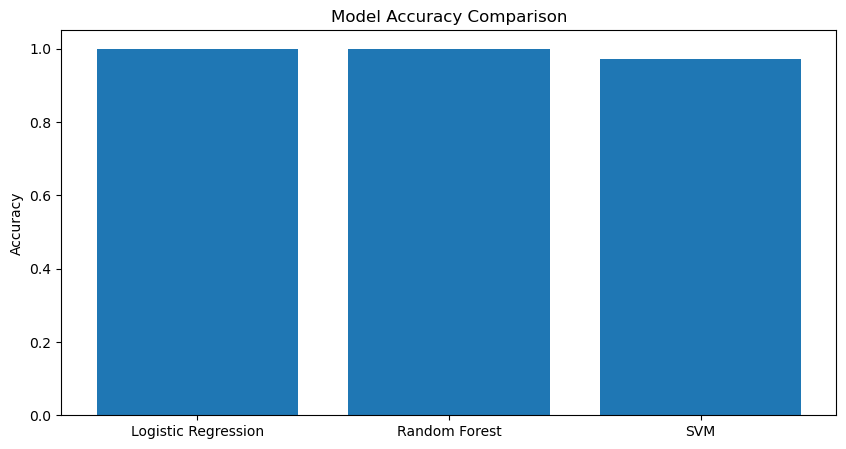

In [57]:
# Prepare data for modeling
# Assuming the target column is named 'TargetColumn'. Replace it with the actual target column name.
X = df.drop('Smokes (packs/year)', axis=1)  
y = df['Schiller']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix Visualization can be added here

# Visual comparison of models
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00         8

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       164
           1       1.00      1.00      1.00         8

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

SVM Accuracy: 0.9825581395348837
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       164
           1       1.00      0.62      0.77         8

    accuracy                           0.98       172
   macro avg       0.99      0.81

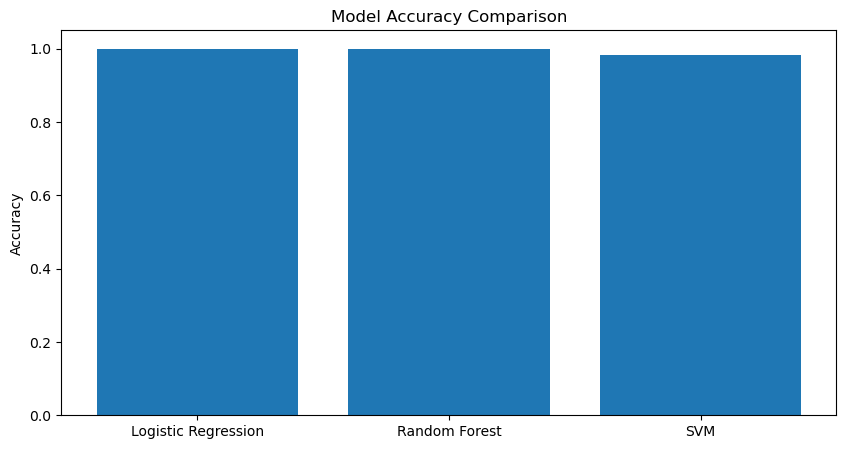

In [58]:
X = df.drop('Biopsy', axis=1)  
y = df['Hinselmann']  
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize and train models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix Visualization can be added here

# Visual comparison of models
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


Logistic Regression Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        17

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

Random Forest Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       155
           1       1.00      1.00      1.00        17

    accuracy                           1.00       172
   macro avg       1.00      1.00      1.00       172
weighted avg       1.00      1.00      1.00       172

SVM Accuracy: 0.9593023255813954
              precision    recall  f1-score   support

           0       0.96      1.00      0.98       155
           1       1.00      0.59      0.74        17

    accuracy                           0.96       172
   macro avg       0.98      0.79

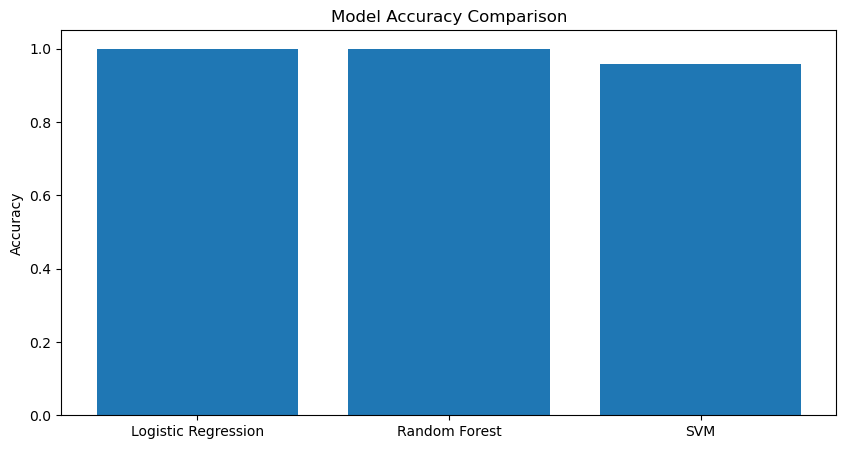

In [59]:
# Assuming 'df' is your DataFrame and you want to use specific features by name
features_to_use = ['Hinselmann', 'Biopsy', 'Smokes (packs/year)']
X = df[features_to_use]

# And if 'TargetName' is your target variable
y = df['Schiller']

# Splitting the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC()
}
results = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))
    # Confusion Matrix Visualization can be added here

# Visual comparison of models
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()


Logistic Regression Accuracy: 0.9593023255813954
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       155
           1       0.92      0.65      0.76        17

    accuracy                           0.96       172
   macro avg       0.94      0.82      0.87       172
weighted avg       0.96      0.96      0.96       172



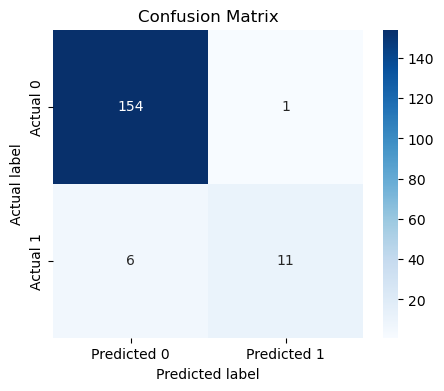

Random Forest Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       155
           1       0.85      0.65      0.73        17

    accuracy                           0.95       172
   macro avg       0.90      0.82      0.85       172
weighted avg       0.95      0.95      0.95       172



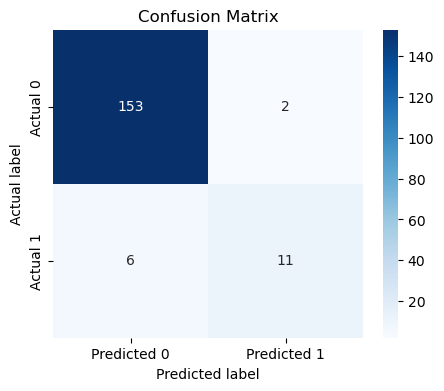

SVM Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       155
           1       0.91      0.59      0.71        17

    accuracy                           0.95       172
   macro avg       0.93      0.79      0.84       172
weighted avg       0.95      0.95      0.95       172



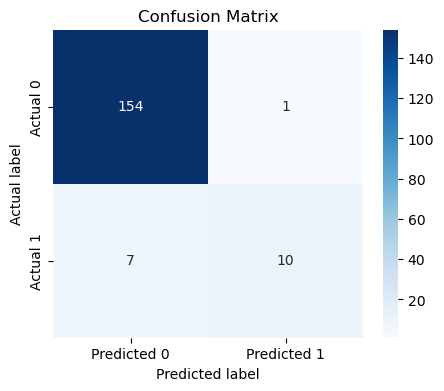

Gradient Boosting Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       155
           1       0.85      0.65      0.73        17

    accuracy                           0.95       172
   macro avg       0.90      0.82      0.85       172
weighted avg       0.95      0.95      0.95       172



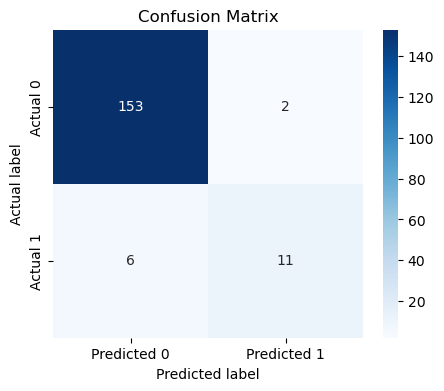

Decision Tree Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       155
           1       0.85      0.65      0.73        17

    accuracy                           0.95       172
   macro avg       0.90      0.82      0.85       172
weighted avg       0.95      0.95      0.95       172



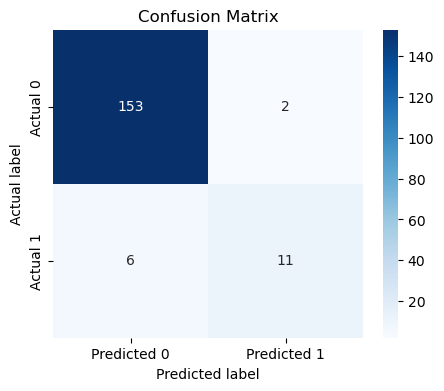

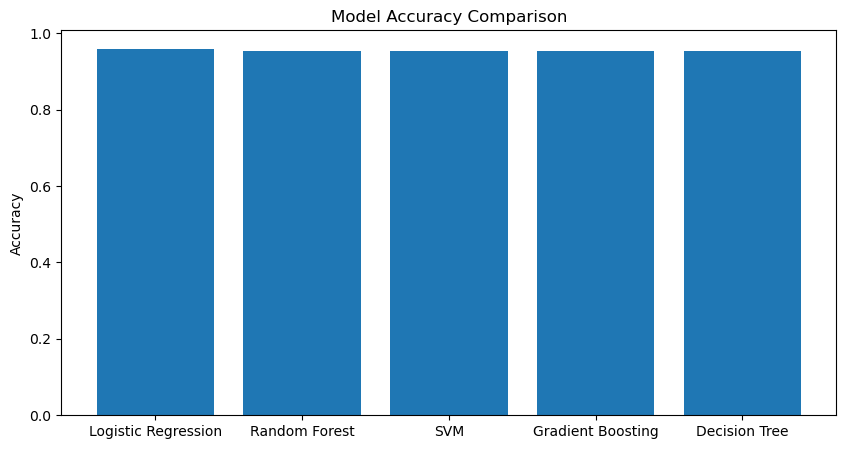

In [60]:
features_to_use = ['Hinselmann', 'Biopsy', 'Smokes (packs/year)']
X = df[features_to_use]

# And if 'TargetName' is your target variable
y = df['Schiller']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (for Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    # Scale the data for models that benefit from it
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Visual comparison of models
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

Logistic Regression Accuracy: 0.9534883720930233
              precision    recall  f1-score   support

           0       0.96      0.99      0.97       155
           1       0.91      0.59      0.71        17

    accuracy                           0.95       172
   macro avg       0.93      0.79      0.84       172
weighted avg       0.95      0.95      0.95       172



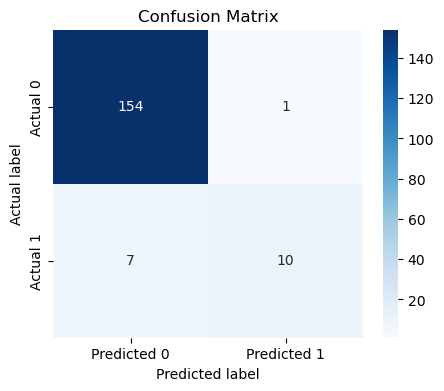

Random Forest Accuracy: 0.9418604651162791
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       155
           1       0.82      0.53      0.64        17

    accuracy                           0.94       172
   macro avg       0.88      0.76      0.81       172
weighted avg       0.94      0.94      0.94       172



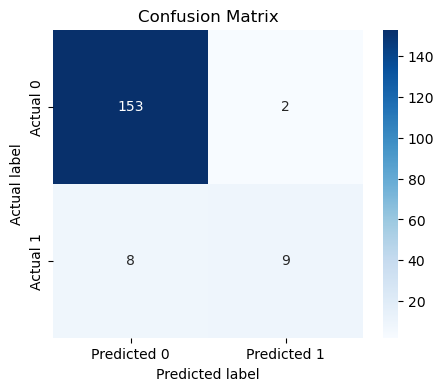

SVM Accuracy: 0.9476744186046512
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       155
           1       0.90      0.53      0.67        17

    accuracy                           0.95       172
   macro avg       0.93      0.76      0.82       172
weighted avg       0.95      0.95      0.94       172



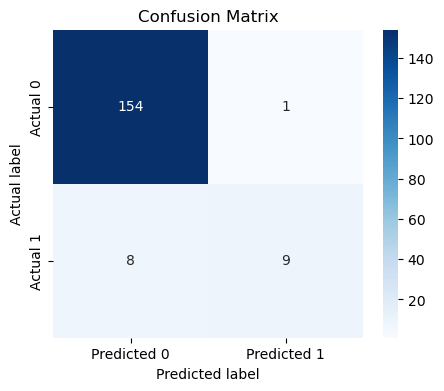

Gradient Boosting Accuracy: 0.9476744186046512
              precision    recall  f1-score   support

           0       0.95      0.99      0.97       155
           1       0.90      0.53      0.67        17

    accuracy                           0.95       172
   macro avg       0.93      0.76      0.82       172
weighted avg       0.95      0.95      0.94       172



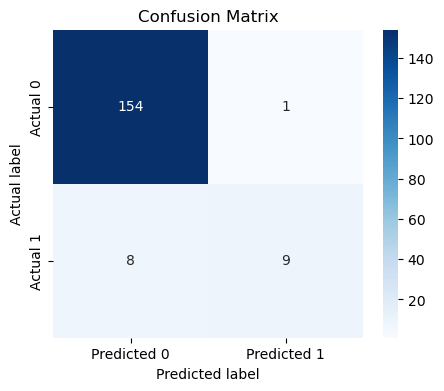

Decision Tree Accuracy: 0.936046511627907
              precision    recall  f1-score   support

           0       0.94      0.99      0.97       155
           1       0.88      0.41      0.56        17

    accuracy                           0.94       172
   macro avg       0.91      0.70      0.76       172
weighted avg       0.93      0.94      0.93       172



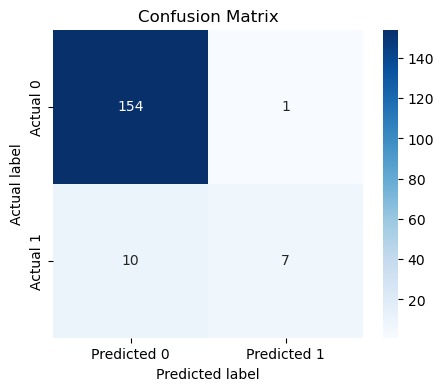

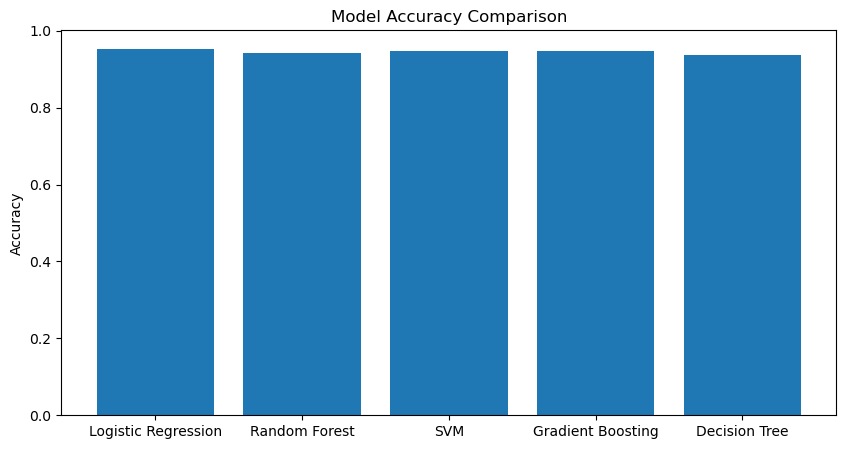

In [61]:
features_to_use = ['Age', 'Biopsy', 'Smokes (packs/year)']
X = df[features_to_use]

# And if 'TargetName' is your target variable
y = df['Schiller']

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale the features (for Logistic Regression and SVM)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Models
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Decision Tree": DecisionTreeClassifier()
}

results = {}

for name, model in models.items():
    # Scale the data for models that benefit from it
    if name in ["Logistic Regression", "SVM"]:
        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = accuracy
    print(f"{name} Accuracy: {accuracy}")
    print(classification_report(y_test, y_pred))

    # Compute and plot the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=['Predicted 0', 'Predicted 1'], yticklabels=['Actual 0', 'Actual 1'])
    plt.title(f'Confusion Matrix')
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')
    plt.show()

# Visual comparison of models
plt.figure(figsize=(10, 5))
plt.bar(results.keys(), results.values())
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()